# **Task 3: Modeling**

In [1]:
# Data processing
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# Stat tools 
from scipy import stats

In [3]:
dataset = pd.read_csv("data_raw/data_all_agg_prep.csv", parse_dates=['order_purchase_timestamp',
                                         'order_approved_at',
                                         'shipping_limit_date',
                                         'order_delivered_carrier_date',
                                         'order_delivered_customer_date',
                                         'order_estimated_delivery_date'])

In [4]:
dataset["order_purchase_year"] = dataset.order_purchase_timestamp.dt.year

In [5]:
dataset["order_purchase_month"] = dataset.order_purchase_timestamp.dt.month

In [6]:
dataset["order_purchase_day"] = dataset.order_purchase_timestamp.dt.day

In [7]:
dataset["order_purchase_hour"] = dataset.order_purchase_timestamp.dt.hour

In [8]:
dataset["weekend"] = dataset.order_purchase_timestamp.dt.weekday == 6

In [9]:
dataset.replace({False: 0, True: 1}, inplace=True)

In [10]:
dataset.drop(columns=['customer_city', 'customer_state', 'customer_lat', 'customer_lng', 'seller_city', 'seller_state', 'seller_lat', 'seller_lng'], inplace=True)

In [11]:
dataset.drop(columns=['time_purchase_approved (in hours)', 'time_approved_delivered_carrier (in hours)'], inplace=True)

In [56]:
dataset.drop(columns=['order_purchase_year', 'order_purchase_hour', 'weekend', 'same_state', 'same_city'], inplace=True)

In [13]:
dataset.drop(columns=['order_purchase_timestamp'], inplace=True)

In [14]:
dataset.drop(columns=['order_approved_at', 'shipping_limit_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'], inplace=True)

In [57]:
dataset

price  freight_value  product_weight_g  product_volume  distance_km  delivery_time_hours  shipping_limit_date_overdue  order_purchase_month  order_purchase_day
0       58.90          13.29             650.0          3528.0       301.50           182.746111                            0                     9                  13
1      239.90          19.93           30000.0         60000.0       585.56           389.188333                            0                     4                  26
2      199.00          17.87            3050.0         14157.0       312.34           190.762500                            1                     1                  14
3       12.99          12.79             200.0          2400.0       293.17           147.534444                            1                     8                   8
4      199.90          18.14            3750.0         42000.0       646.16           602.744444                            0                     2                   4
...       ...            ...               ...             ...          ...                  ...                          ...                   ...                 ...
94648  299.99          43.41           10150.0         53400.0      2754.54           416.992778                            1                     4                  23
94649  350.00          36.53            8950.0         44460.0       351.73           226.085833                            1                     7                  14
94650   99.90          16.95             967.0          9576.0       339.06           115.240556                            1                    10                  23
94651   55.99           8.72             100.0          8000.0        72.34            46.944722                            1                     8                  14
94652   43.00          12.79             600.0          1710.0       134.98           120.935556                            1                     6                   9

[94653 rows x 9 columns]

In [58]:
dataset.corr().loc[:, 'delivery_time_hours']

price                          0.055343
freight_value                  0.167262
product_weight_g               0.072359
product_volume                 0.063798
distance_km                    0.394539
delivery_time_hours            1.000000
shipping_limit_date_overdue   -0.230812
order_purchase_month          -0.055694
order_purchase_day            -0.000310
Name: delivery_time_hours, dtype: float64

In [17]:
dataset.to_csv("data_raw/dataset.csv", index=False)

In [59]:
X = dataset.loc[:, dataset.columns != "delivery_time_hours"]
Y = dataset.loc[:, "delivery_time_hours"]

In [60]:
X

price  freight_value  product_weight_g  product_volume  distance_km  shipping_limit_date_overdue  order_purchase_month  order_purchase_day
0       58.90          13.29             650.0          3528.0       301.50                            0                     9                  13
1      239.90          19.93           30000.0         60000.0       585.56                            0                     4                  26
2      199.00          17.87            3050.0         14157.0       312.34                            1                     1                  14
3       12.99          12.79             200.0          2400.0       293.17                            1                     8                   8
4      199.90          18.14            3750.0         42000.0       646.16                            0                     2                   4
...       ...            ...               ...             ...          ...                          ...                   ...                 ...
94648  299.99          43.41           10150.0         53400.0      2754.54                            1                     4                  23
94649  350.00          36.53            8950.0         44460.0       351.73                            1                     7                  14
94650   99.90          16.95             967.0          9576.0       339.06                            1                    10                  23
94651   55.99           8.72             100.0          8000.0        72.34                            1                     8                  14
94652   43.00          12.79             600.0          1710.0       134.98                            1                     6                   9

[94653 rows x 8 columns]

In [292]:
from lazypredict.Supervised import LazyRegressor

ModuleNotFoundError: No module named 'sklearn.utils.testing'

In [68]:
from sklearn.model_selection import train_test_split

In [62]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [63]:
import sklearn
sklearn.__version__

'0.24.2'

In [64]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None

In [69]:
dataset

price  freight_value  product_weight_g  product_volume  distance_km  delivery_time_hours  shipping_limit_date_overdue  order_purchase_month  order_purchase_day
0       58.90          13.29             650.0          3528.0       301.50           182.746111                            0                     9                  13
1      239.90          19.93           30000.0         60000.0       585.56           389.188333                            0                     4                  26
2      199.00          17.87            3050.0         14157.0       312.34           190.762500                            1                     1                  14
3       12.99          12.79             200.0          2400.0       293.17           147.534444                            1                     8                   8
4      199.90          18.14            3750.0         42000.0       646.16           602.744444                            0                     2                   4
...       ...            ...               ...             ...          ...                  ...                          ...                   ...                 ...
94648  299.99          43.41           10150.0         53400.0      2754.54           416.992778                            1                     4                  23
94649  350.00          36.53            8950.0         44460.0       351.73           226.085833                            1                     7                  14
94650   99.90          16.95             967.0          9576.0       339.06           115.240556                            1                    10                  23
94651   55.99           8.72             100.0          8000.0        72.34            46.944722                            1                     8                  14
94652   43.00          12.79             600.0          1710.0       134.98           120.935556                            1                     6                   9

[94653 rows x 9 columns]

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [71]:
Y_test

87174    119.390556
73112    128.686389
21783    148.288611
22529    238.959444
43500     74.222500
            ...    
56293    355.770556
60373    310.774444
27107    260.588333
88451    167.505833
10479    328.630000
Name: delivery_time_hours, Length: 18931, dtype: float64

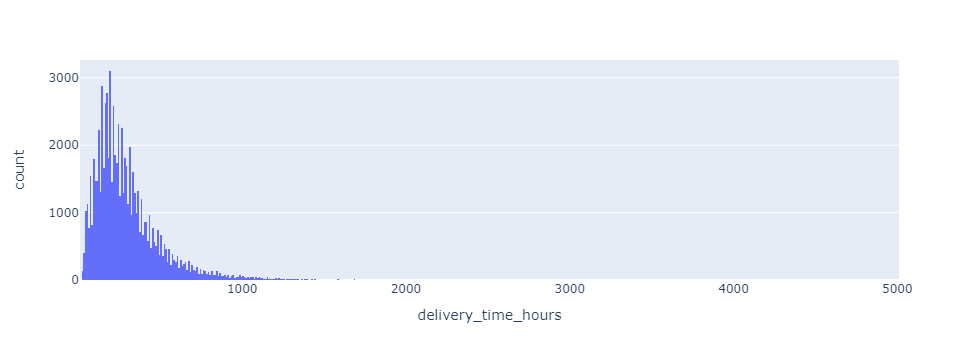

In [46]:
fig = px.histogram(data_frame=Y_train, x="delivery_time_hours")
fig.show()

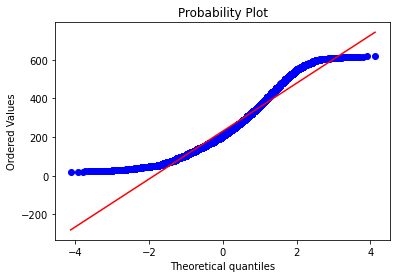

In [230]:
# Q-Q plot
res = stats.probplot(Y_train, dist='norm', plot=plt)

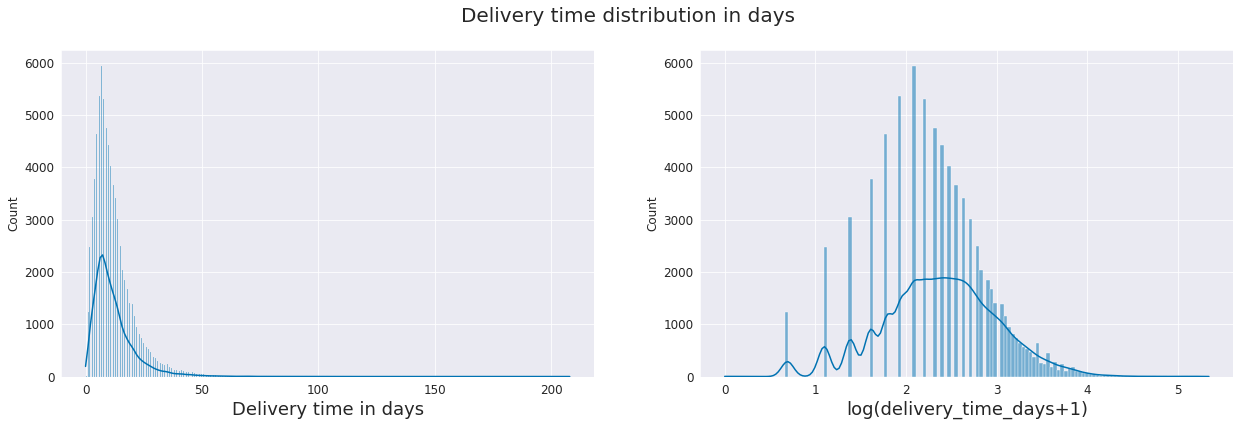

In [16]:
# We have some problems with price distribution and have to deal with them
# Let's take a look at the density plot of skewed data and after log(x+1) transformation
fig, axes = plt.subplots(1,2, figsize=(21,6))
fig.suptitle('Delivery time distribution in days', fontsize=20)
sns.histplot(Y_train['delivery_time_days'], kde=True, ax=axes[0])
sns.histplot(np.log1p(Y_train['delivery_time_days']), kde=True, ax=axes[1])
axes[0].set_xlabel('Delivery time in days', fontsize=18)
axes[1].set_xlabel('log(delivery_time_days+1)', fontsize=18)
plt.show()

### **Test models without log transformation**

In [21]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

NameError: name 'LazyRegressor' is not defined

In [37]:
%%time
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

 29%|██▊       | 12/42 [00:41<01:46,  3.56s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
GaussianProcessRegressor model failed to execute
Unable to allocate 42.7 GiB for an array with shape (75722, 75722) and data type float64


 43%|████▎     | 18/42 [01:34<02:41,  6.73s/it]

KernelRidge model failed to execute
Unable to allocate 42.7 GiB for an array with shape (75722, 75722) and data type float64


100%|██████████| 42/42 [20:11<00:00, 28.85s/it] 


In [38]:
# I have done several tests with various features, each time increasing the R^2.
# And each time, based on the train_time / RMSE performance, LGBMRegressor was the best model
# Probably we could work with it to save time
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.40       0.40  7.49        0.44
HistGradientBoostingRegressor                0.39       0.39  7.53        1.22
XGBRegressor                                 0.39       0.39  7.57        2.94
GradientBoostingRegressor                    0.39       0.39  7.57       19.54
MLPRegressor                                 0.38       0.38  7.60      128.22
RandomForestRegressor                        0.37       0.37  7.67       82.66
ExtraTreesRegressor                          0.35       0.35  7.78       27.02
LarsCV                                       0.35       0.35  7.79        0.52
LassoLarsCV                                  0.35       0.35  7.79        0.50
LassoLarsIC                                  0.35       0.35  7.79        0.18
LassoCV                                      0.35       0.35  7.79        1.45
Lars                                         0.35       0.35  7.79        0.09
TransformedTargetRegressor                   0.35       0.35  7.79        0.11
LinearRegression                             0.35       0.35  7.79        0.20
Ridge                                        0.35       0.35  7.79        0.08
RidgeCV                                      0.35       0.35  7.79        0.23
BayesianRidge                                0.35       0.35  7.79        0.14
ElasticNetCV                                 0.35       0.35  7.79        0.95
SGDRegressor                                 0.35       0.35  7.80        0.49
OrthogonalMatchingPursuitCV                  0.34       0.34  7.82        0.43
NuSVR                                        0.33       0.33  7.90      475.05
HuberRegressor                               0.32       0.32  7.99        1.13
SVR                                          0.31       0.31  8.00      413.64
Lasso                                        0.31       0.31  8.05        0.14
LinearSVR                                    0.30       0.30  8.06        8.35
BaggingRegressor                             0.30       0.30  8.09        8.36
ElasticNet                                   0.29       0.29  8.14        0.09
TweedieRegressor                             0.29       0.29  8.15        0.20
GeneralizedLinearRegressor                   0.29       0.29  8.15        0.13
KNeighborsRegressor                          0.26       0.26  8.32       31.07
AdaBoostRegressor                            0.22       0.23  8.51        2.40
OrthogonalMatchingPursuit                    0.15       0.15  8.90        0.10
DummyRegressor                              -0.00      -0.00  9.67        0.06
LassoLars                                   -0.00      -0.00  9.67        0.18
PoissonRegressor                            -0.14      -0.14 10.33        0.36
DecisionTreeRegressor                       -0.25      -0.25 10.79        1.46
ExtraTreeRegressor                          -0.29      -0.29 10.99        0.41
RANSACRegressor                             -0.34      -0.34 11.19        0.60
PassiveAggressiveRegressor                  -0.48      -0.47 11.74        0.26

In [72]:
# Let's import all necessary models
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn import svm
from lightgbm import LGBMRegressor
import time
from sklearn.model_selection import train_test_split

In [73]:
X_test

price  freight_value  product_weight_g  product_volume  distance_km  shipping_limit_date_overdue  order_purchase_month  order_purchase_day
87174  789.99          14.34             660.0          4256.0        28.67                            1                     5                  18
73112  176.99          13.14            2350.0         10240.0        96.74                            1                     3                  10
21783   56.99          15.15             250.0          3360.0       601.35                            1                    10                  14
22529   21.98          30.20             200.0          1408.0       385.83                            1                     6                  11
43500   16.99           7.39             150.0          1188.0        95.69                            1                     4                  15
...       ...            ...               ...             ...          ...                          ...                   ...                 ...
56293   47.90          15.79             530.0          6800.0      1337.79                            1                     2                   4
60373   64.90          14.62             983.0          5520.0       358.82                            1                     2                   7
27107   29.90          15.11             300.0          5616.0       698.22                            1                     7                  31
88451  138.50          18.22            2083.0         13524.0       882.27                            1                     1                  29
10479   99.80          30.27            1250.0          2480.0       541.18                            1                     5                  22

[18931 rows x 8 columns]

In [29]:
from scipy.stats import zscore
z_scores = stats.zscore(X_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
X_train = X_train[filtered_entries]
Y_train = Y_train[filtered_entries]

In [74]:
X_train

price  freight_value  product_weight_g  product_volume  distance_km  shipping_limit_date_overdue  order_purchase_month  order_purchase_day
88381   27.99          19.04             300.0           816.0      2135.37                            1                     3                  31
66840  120.00          15.59            1650.0         16000.0       452.38                            1                     8                  11
32141   49.99          13.69             200.0          3584.0       163.76                            1                     8                   4
39401   97.90          16.94            2500.0         25432.0       619.12                            1                     6                   8
27063  179.90          25.61             725.0          4800.0      2147.34                            1                     8                   9
...       ...            ...               ...             ...          ...                          ...                   ...                 ...
6265   279.00          19.83             363.0          3042.0       342.70                            1                     4                  26
54886  169.90          18.48            5300.0         31635.0       145.90                            1                     2                  23
76820   89.90          17.88            1383.0         20000.0       323.59                            1                     6                  15
860    105.00          18.54            1250.0         24000.0       491.63                            1                     7                  21
15795  129.99          13.25             700.0         18496.0       453.78                            1                     8                   8

[75722 rows x 8 columns]

In [88]:
model = LGBMRegressor(n_estimators=150)

In [89]:
model

LGBMRegressor(n_estimators=150)

In [90]:
model.fit(X_train, Y_train)

LGBMRegressor(n_estimators=150)

In [91]:
#Here was an experiment with TARGET Log

def rmse_cv(model):
    return cross_val_score(model, X_train, Y_train, scoring='neg_mean_squared_error', cv=5)

In [92]:
# Only with MAE we could compare total error in days for the model
metrics.mean_absolute_error(Y_test, model.predict(X_test))

114.27611651604039

In [93]:
# To compare with test
metrics.mean_squared_error(Y_train, model.predict(X_train))

31123.392657942284

In [94]:
models = [model]

for model in models:
    cv_result = rmse_cv(model)
    print(f'{model.__class__.__name__}: \t{-cv_result.mean()}\n')

LGBMRegressor: 	35065.31263644432



In [95]:
# Estimate the R^2: total dispersion of the dataset
metrics.r2_score(Y_test, model.predict(X_test))

0.3280719901477559

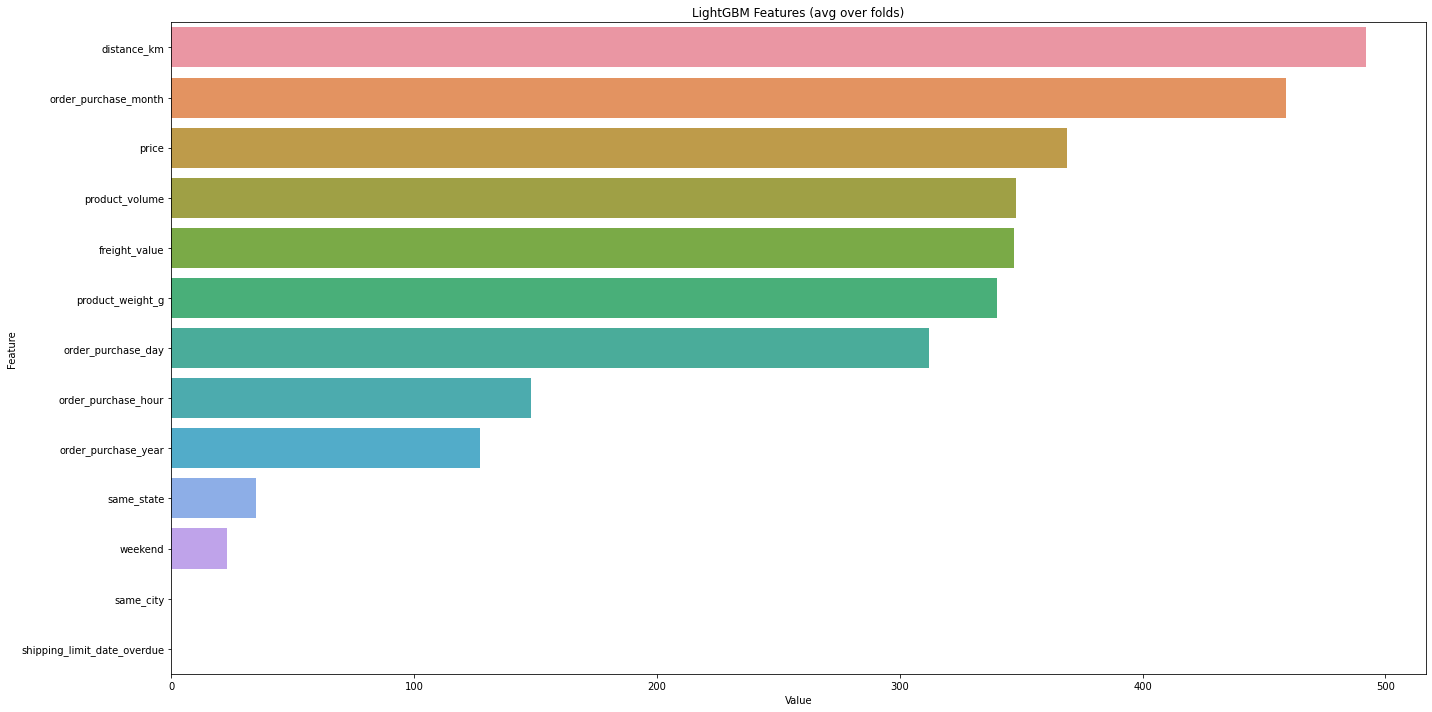

<Figure size 432x288 with 0 Axes>

In [54]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

Вирахували бажані клієнтом метрики для його існуєчого алгоритму, а також запропонували свої варіанти. Також згенерували нові фічі, спробували запустити на них декілька базових моделей, вибрали одну найкращу. Для неї провели аналіх важливості фіч. Також було вирахувана на замовлення клієнта кореляція, побудований графік залежності часу доставки від швидкості. 